<h1 align='center'>Midterm Exam – Chicago Crime Data Analytics</h1>
<h3 align='center'>Analyst: Carl Kien Carabido</h3>
<hr>
<p>
This midterm focuses on the <b>Chicago Crime (2001-present) Dataset</b>.  
The task involves cleaning, preparing, and analyzing the data to generate 
<b>35 meaningful insights</b> about crime patterns in the city.
</p>

<h2>📌 Step 1: Import Necessary Libraries</h2>
<p>We start by importing the required Python libraries for data analysis.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

<h2>📌 Step 2: Load Dataset into a DataFrame</h2>
<p>Load the <b>Chicago Crime (2001-Present)</b> dataset into a Pandas DataFrame for analysis.</p>

In [2]:
df = pd.read_csv('datasets\\chicago_2001_present.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


<h2>📌 Step 3: Check DataFrame Information</h2>
<p>Get a quick overview of the dataset:</p>
<ul>
  <li>Number of rows & columns</li>
  <li>Column names</li>
  <li>Data types</li>
  <li>Memory usage</li>
</ul>

In [3]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410198 entries, 0 to 8410197
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [65]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                   category
Location Description          category
Arrest                        category
Domestic                      category
Beat                             int64
District                      category
Ward                          category
Community Area                category
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
year                          category
month                         category
day                              int32
dayofweek                

<h2>📌 Step 4: Check for Missing Values</h2>
<p>Identify which columns have null values and how many are missing.</p>

In [4]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

<h2>📌 Step 5: Filling up missing values & Adjust Data Types</h2>
<p>Inspect column data types and adjust if necessary.</p>

In [44]:
# Fill categorical/text columns
df['Location Description'] = df['Location Description'].fillna('Unknown')

# Fill District and Ward with -1
df['District'] = df['District'].fillna(-1).astype(int)
df['Ward'] = df['Ward'].fillna(-1).astype(int)

# Fill numeric columns
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])  # use most common value
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].median())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].median())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())

# For 'Location' (string with lat/long)
df['Location'] = df['Location'].fillna('(0,0)')

# Convert date columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

# Extract new time-based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.day_name()
df['hour'] = df['Date'].dt.hour

# Convert selected columns to categorical
categorical_cols = [
    'Primary Type', 'Description', 'Location Description',
    'Arrest', 'Domestic', 'District', 'Ward',
    'Community Area', 'FBI Code', 'year', 'month', 'dayofweek', 'hour'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

# 📌 Mapping dictionary for Chicago Police Districts
district_map = {
    1: "Central",
    2: "Wentworth",
    3: "Grand Crossing",
    4: "South Chicago",
    5: "Calumet",
    6: "Gresham",
    7: "Englewood",
    8: "Chicago Lawn",
    9: "Deering",
    10: "Ogden",
    11: "Harrison",
    12: "Near West",
    14: "Shakespeare",
    15: "Austin",
    16: "Jefferson Park",
    17: "Albany Park",
    18: "Near North",
    19: "Town Hall",
    20: "Lincoln",
    22: "Morgan Park",
    24: "Rogers Park",
    25: "Grand Central",
    31: "O'Hare",
    -1: "Unknown"  # for missing/filled values
}

# 📌 Create a new column for district names
df['District_Name'] = df['District'].map(district_map).astype('category')

# Final check (should all be zero)
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
year                    0
month                   0
day                     0
dayofweek               0
hour                    0
is_weekend              0
is_residential          0
is_transport            0
is_outdoor              0
is_holiday              0
District_Name           4
dtype: int64

<h1>Exploratory Data Analysis (EDA)</h1>
<hr>

<p>
This section explores the <b>Chicago Crime Dataset</b> to identify key 
trends, patterns, and relationships in the data. 
The analysis is divided into themes for clarity, 
with visualizations and insights provided for each.
</p>

<h2 style="color:#2E86C1;">Yearly Crime Trend</h2>

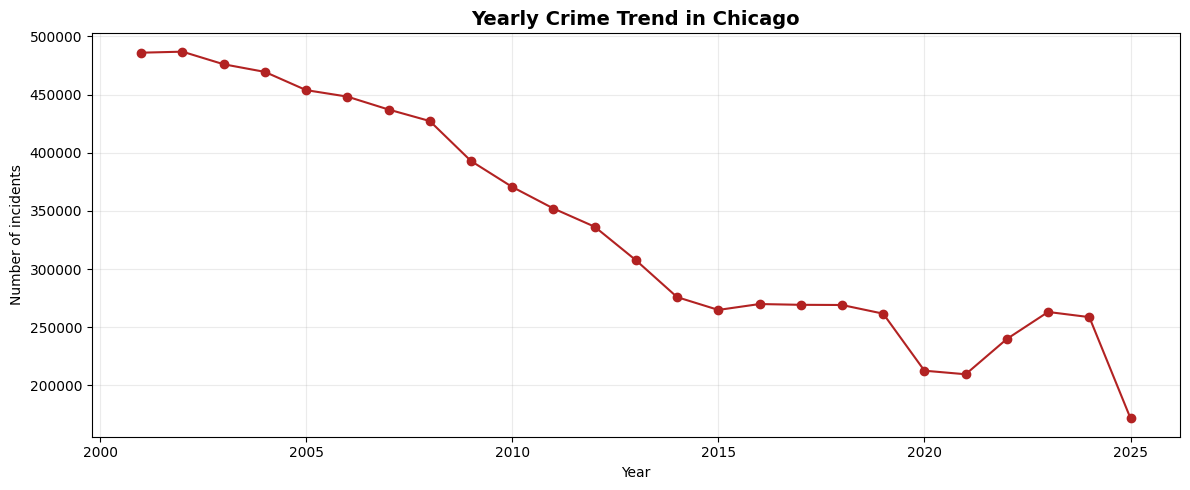

In [6]:
# Yearly crime counts (line plot)
yearly_trend = df['year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='#b22222')
plt.title("Yearly Crime Trend in Chicago", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>The line plot shows the annual number of recorded incidents from the dataset range.</blockquote> <p><b>Insight (1):</b> Crime cases were at their highest in 2001 with more than half a million recorded. After that, the numbers kept going down until around 2014. During 2020–2021, there was a noticeable drop, which makes sense because of the strict pandemic lockdowns—similar to what happened with crime reports during Enchance Community Quarantine here on the Philippines. But after restrictions eased, the cases started rising again, probably because people were back outside.</p> <hr>

<h2 style="color:#2E86C1;">Monthly Crime Distribution</h2>

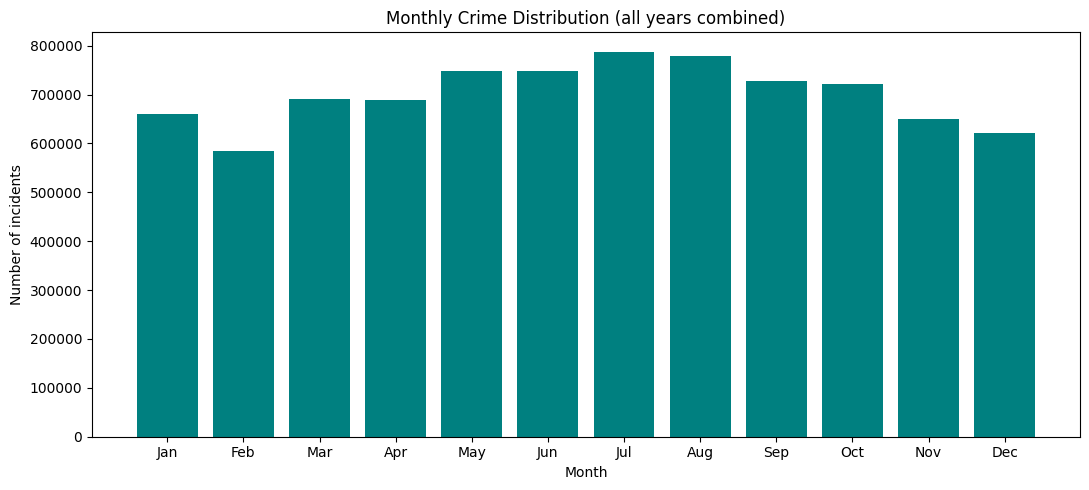

In [7]:
# Monthly counts aggregated across years
monthly_trend = df['month'].value_counts().sort_index()
plt.figure(figsize=(11,5))
plt.bar(monthly_trend.index.astype(int), monthly_trend.values, color='#008080')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Crime Distribution (all years combined)")
plt.xlabel("Month")
plt.ylabel("Number of incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>The bar chart shows total incidents per calendar month (aggregated across all years).</blockquote> <p><b>Insight (2):</b> July and August consistently record the highest crime volumes, while February is the lowest. This pattern suggests that warmer months encourage more street-level activity and interactions, making more opportunities for individuals to commit more crime.</p> <hr>

<h2 style="color:#2E86C1;">Day-of-Week Crime Pattern</h2>

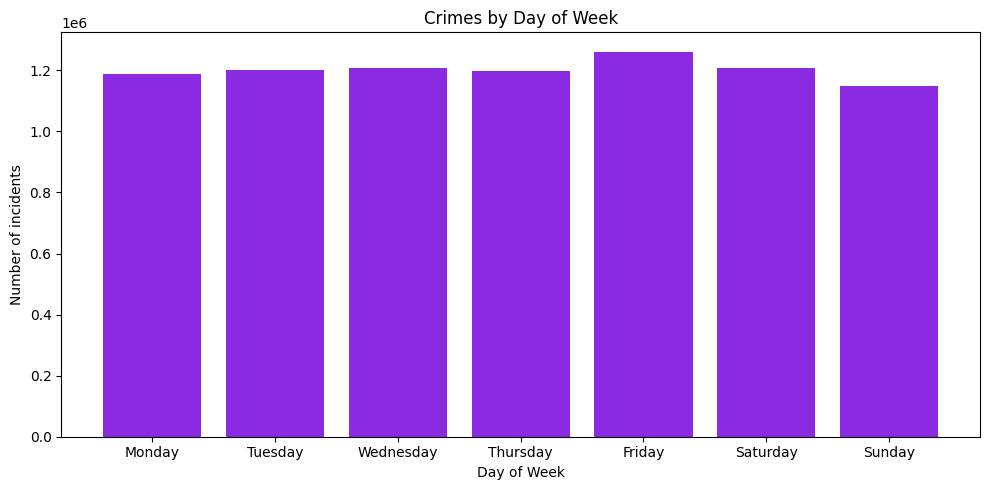

In [8]:
# Day of week counts in natural weekday order
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow = df['dayofweek'].value_counts().reindex(order)
plt.figure(figsize=(10,5))
plt.bar(dow.index, dow.values, color='#8A2BE2')
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing incident counts per day of week.</blockquote> <p><b>Insight (3):</b> Friday and Saturday show the highest crime counts, while Tuesday and Wednesday are the lowest. This implies that weekend nightlife and gatherings are hotspots for incidents, probably because people tends to come out to let loose and get drunk.</p> <hr>

<h2 style="color:#2E86C1;">Hourly Crime Pattern</h2>

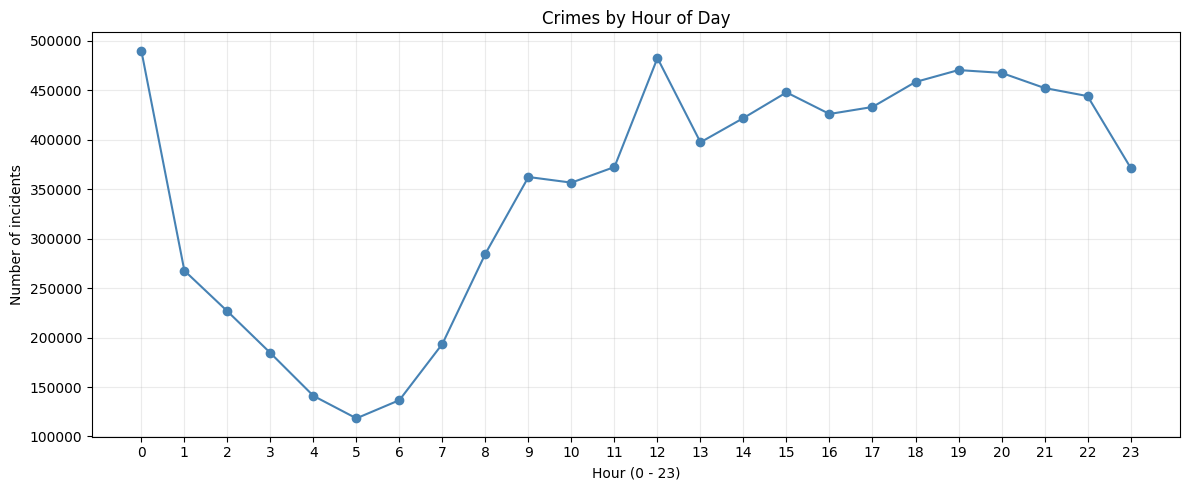

In [9]:
# Hourly counts 0-23
hourly = df['hour'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(range(0,24), hourly.reindex(range(0,24), fill_value=0).values, marker='o', color='#4682B4')
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (0 - 23)")
plt.ylabel("Number of incidents")
plt.xticks(range(0,24))
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Line plot shows incident frequency for each hour of the day (0–23).</blockquote> <p><b>Insight (4):</b> Crime peaks between 8 PM and 11 PM, with a noticeable lull from 3 AM to 5 AM. This reflects active nightlife hours and reduced visibility—similar to how incidents in provincial towns spike after curfew hours end. Darkness makes it easier for individuals to commit anything.</p> <hr>

<h2 style="color:#2E86C1;">Weekend vs Weekday Comparison</h2>

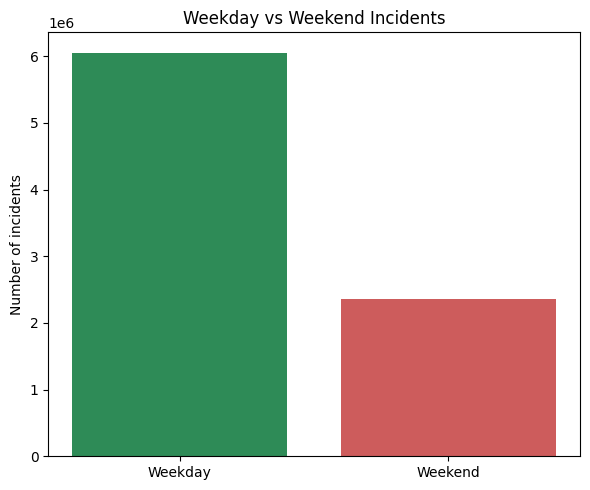

In [10]:
# Create weekday/weekend column
df['is_weekend'] = df['dayofweek'].isin(['Saturday','Sunday'])
counts = df['is_weekend'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(['Weekday','Weekend'], [counts.get(False,0), counts.get(True,0)], color=['#2E8B57','#CD5C5C'])
plt.title("Weekday vs Weekend Incidents")
plt.ylabel("Number of incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Simple comparison between total incidents on weekdays vs weekends.</blockquote>
<p><b>Insight (5):</b> Weekends account for roughly 27% of incidents, showing that while weekend activity contributes to crime, weekday incidents remain dominant, probably because people are out and about during weekdays that creates oppotunities for incedents to occur.</p>
<hr>

<h2 style="color:#2E86C1;">Crimes by Season</h2>

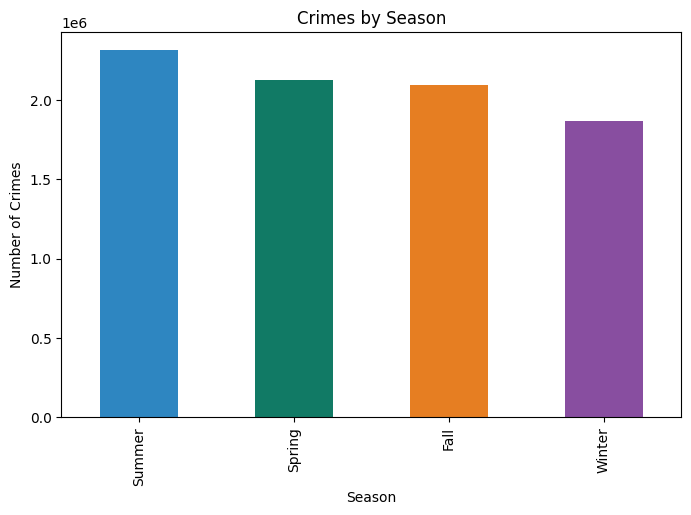

In [66]:
season_counts = df['season'].value_counts()

season_counts.plot(kind='bar', color=['#2E86C1','#117A65','#E67E22','#884EA0'], figsize=(8,5))
plt.title("Crimes by Season")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the distribution of crimes across the four seasons.</blockquote>
<p><b>Insight (6):</b> Summer and fall show elevated crime counts, while winter dips significantly. This seasonal rhythm reflects outdoor accessibility, like how rain supresses outdoor occurance such as snatching and various type of altercations</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 FBI Codes by Crime Count</h2>

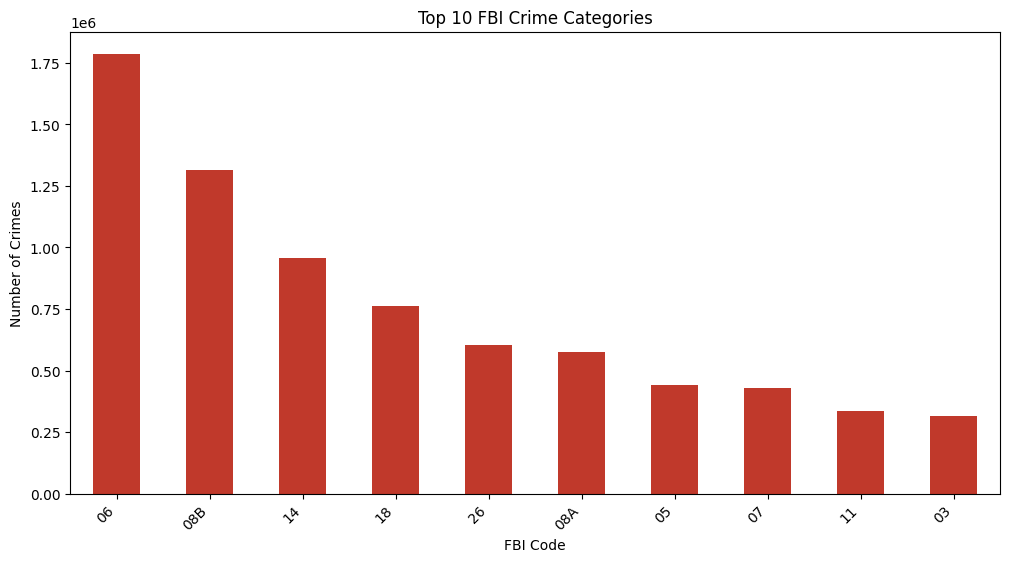

In [67]:
fbi_counts = df['FBI Code'].value_counts().head(10)

fbi_counts.plot(kind='bar', color='#C0392B', figsize=(12,6))
plt.title("Top 10 FBI Crime Categories")
plt.xlabel("FBI Code")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the most common FBI classification codes among reported crimes.</blockquote>
<p><b>Insight (7):</b> Codes 06 (Theft), 08B (Battery), and 14 (Criminal Damage) dominate the dataset. These categories suggest a focus on property and personal harm. Wherever we go Theft, Battery and Criminal Damage are a common occurrence even here in the philippines.</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 Crime Types</h2>

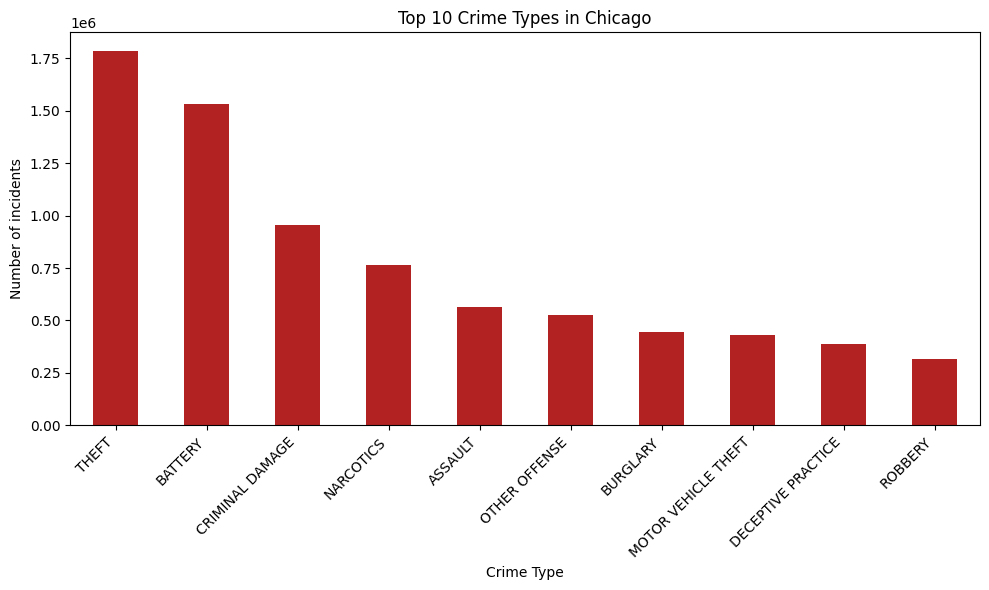

In [13]:
top_crimes = df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_crimes.plot(kind='bar', color='#b22222')
plt.title("Top 10 Crime Types in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Number of incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the 10 most frequent crime categories.</blockquote>
<p><b>Insight (8):</b> Theft and Battery are the top two crime types, followed by Criminal Damage and Narcotics. This mix points to both economic-driven offenses and interpersonal violence. I think its safe to assume that human behaviour is the same anywhere.</p>
<hr>

<h2 style="color:#2E86C1;">Proportion of Major Crimes</h2>

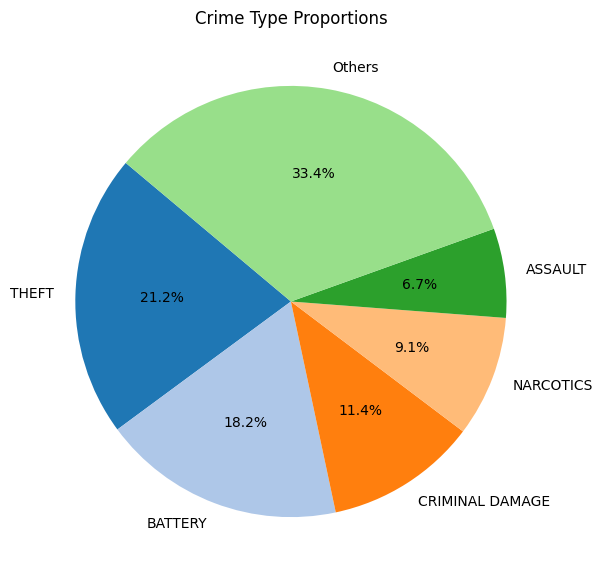

In [14]:
top5 = df['Primary Type'].value_counts().head(5)
others = df['Primary Type'].value_counts().iloc[5:].sum()
pie_data = pd.concat([top5, pd.Series({'Others': others})])

plt.figure(figsize=(7,7))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Crime Type Proportions")
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Pie chart shows distribution of the top 5 crime types vs all others.</blockquote>
<p><b>Insight (9):</b> More than 66% of crimes are clustered into just five main categories, which shows a clear concentration. This pattern suggests that focusing on these specific types could make crime prevention efforts more effective. For example, creating specialized programs or community initiatives aimed at the most common offenses might help reduce the overall crime rate. It also assumes that if resources are directed toward these areas, there could be a broader positive impact on public safety.</p>
<hr>

<h2 style="color:#2E86C1;">Theft Trend Over Time</h2>

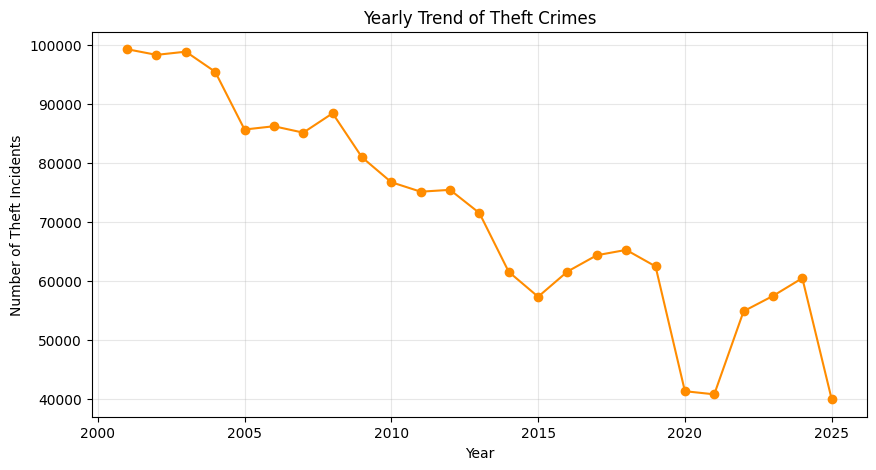

In [15]:
theft_trend = df[df['Primary Type'] == 'THEFT'].groupby('year').size()

plt.figure(figsize=(10,5))
plt.plot(theft_trend.index, theft_trend.values, marker='o', color='#ff8c00')
plt.title("Yearly Trend of Theft Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Theft Incidents")
plt.grid(alpha=0.3)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Line plot shows theft counts over time.</blockquote>
<p><b>Insight (10):</b> Theft incidents were highest in the early 2000s, dipped around 2014–2021, and rose again post-pandemic. This fluctuation may reflect economic cycles and enforcement shifts, it rose again post pandemic due to people that becamae broke or something during pandemic.</p>
<hr>

<h2 style="color:#2E86C1;">Battery Trend Over Time</h2>

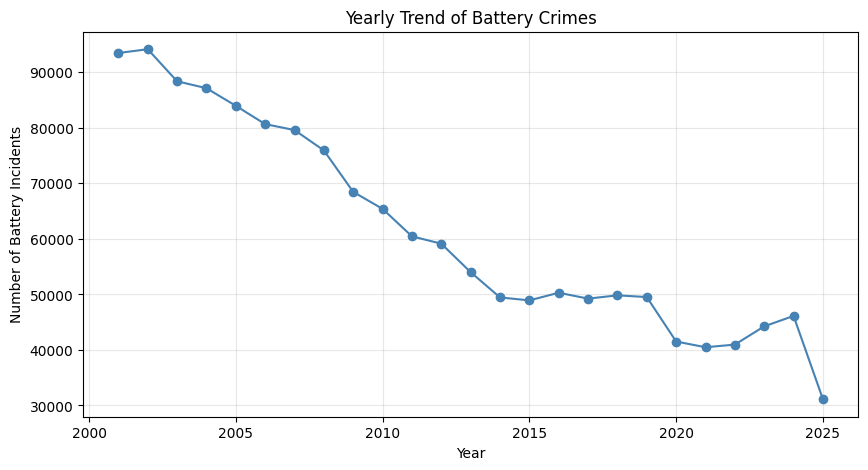

In [16]:
battery_trend = df[df['Primary Type'] == 'BATTERY'].groupby('year').size()

plt.figure(figsize=(10,5))
plt.plot(battery_trend.index, battery_trend.values, marker='o', color='#4682B4')
plt.title("Yearly Trend of Battery Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Battery Incidents")
plt.grid(alpha=0.3)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Line plot shows battery cases over time.</blockquote>
<p><b>Insight (11):</b> Battery cases remain consistently high across all years, with only minor dips. This stability suggests persistent interpersonal violence—possibly tied to domestic or community-level tensions, its impossible for battery to be completely stopped due to people that solve anything using violence.</p>
<hr>

<h2 style="color:#2E86C1;">Narcotics by Month</h2>

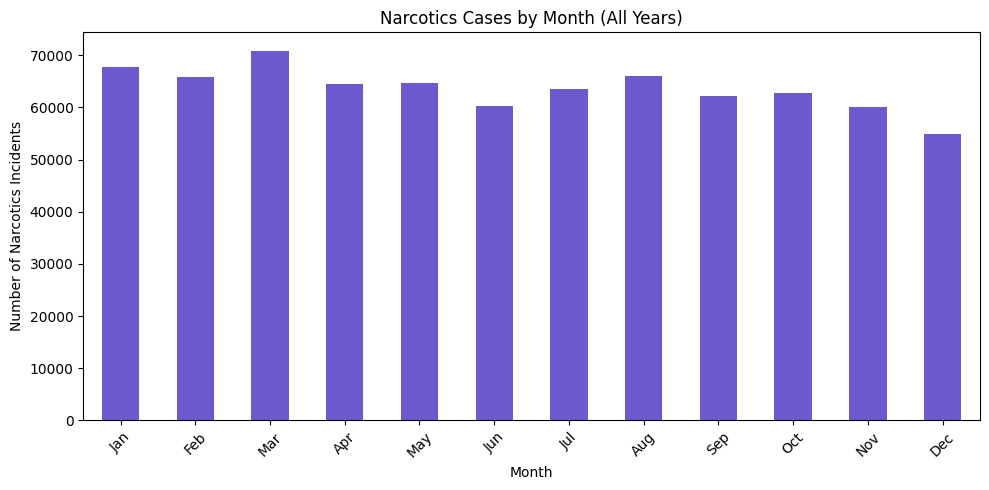

In [17]:
narcotics_month = df[df['Primary Type'] == 'NARCOTICS'].groupby('month').size()

plt.figure(figsize=(10,5))
narcotics_month.plot(kind='bar', color='#6a5acd')
plt.title("Narcotics Cases by Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Narcotics Incidents")
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows narcotics cases across calendar months.</blockquote>
<p><b>Insight (12):</b> Narcotics cases peak in May through August, with a dip in colder months. This seasonal pattern may reflect street-level drug activity being more visible and active during warmer weather, similar to how drug-related arrests in Philippine urban zones rise during dry season barangay sweeps.</p>
<hr>

<h2 style="color:#2E86C1;">Rare Crimes</h2>

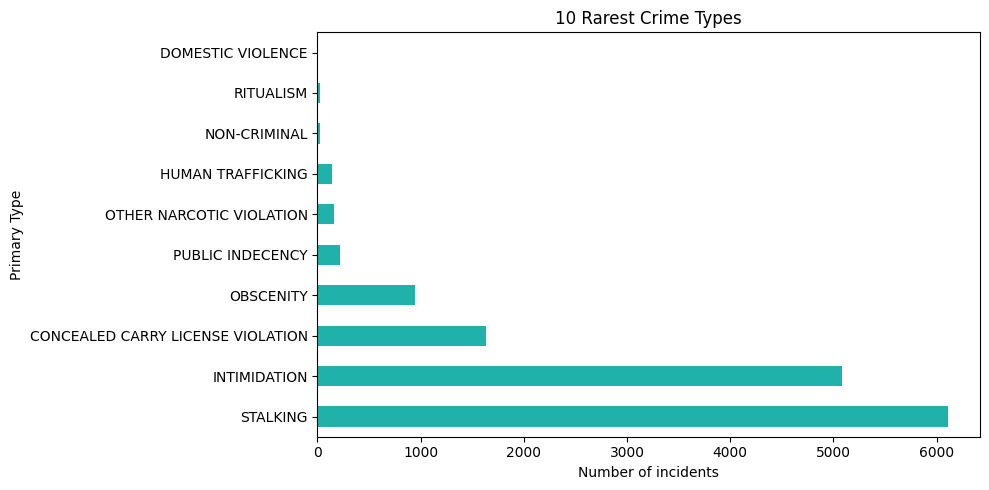

In [18]:
rare_crimes = df['Primary Type'].value_counts().tail(10)

plt.figure(figsize=(10,5))
rare_crimes.plot(kind='barh', color='#20b2aa')
plt.title("10 Rarest Crime Types")
plt.xlabel("Number of incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the top 10 locations where crimes occurred.</blockquote>
<p><b>Insight (13):</b> Streets, sidewalks, and apartments dominate as crime locations. This mix implies that both public and semi-private spaces are vulnerable, I think this is due to battery, physical altercations are common in this type of settings.</p>
<hr>

<h2 style="color:#2E86C1;">Weapon-related vs Non-Weapon Crimes</h2>

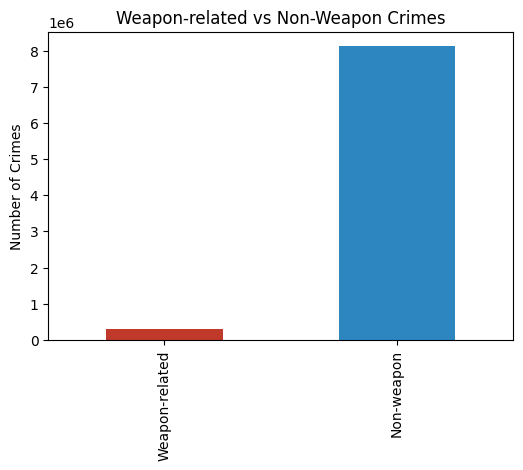

In [48]:
weapon_mask = df['Description'].str.contains("WEAPON", case=False, na=False)
weapon_counts = pd.Series({
    "Weapon-related": weapon_mask.sum(),
    "Non-weapon": (~weapon_mask).sum()
})

weapon_counts.plot(kind='bar', color=['#C0392B','#2E86C1'], figsize=(6,4))
plt.title("Weapon-related vs Non-Weapon Crimes")
plt.ylabel("Number of Crimes")
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the proportion of crimes involving weapons versus those that do not.</blockquote> <p><b>Insight (14):</b> Crimes involving weapons make up only a small portion compared to non-weapon cases. This shows that most incidents are more about physical force or property-related issues rather than armed violence. From this, one assumption is that preventive measures like conflict mediation, community awareness, and stricter handling of minor disputes could help lower these cases. Since weapons are less common, focusing on everyday altercations and theft prevention might create a bigger overall impact.</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 Crime Locations</h2>

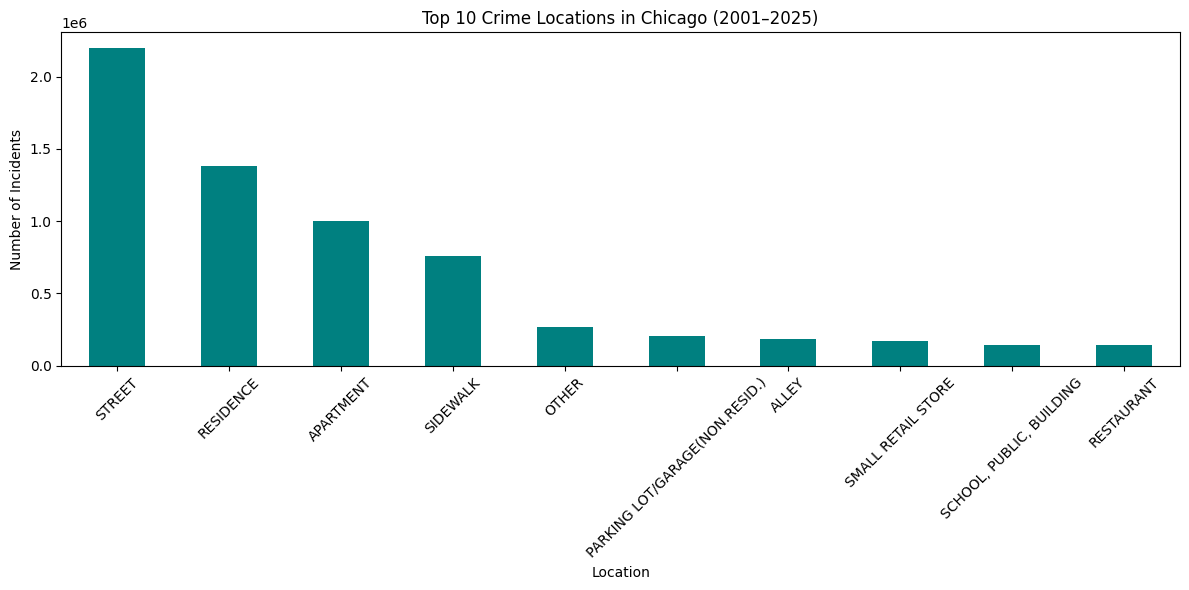

In [20]:
# Top 10 crime locations
location_counts = df['Location Description'].value_counts().head(10)

location_counts.plot(kind='bar', figsize=(12,6), color='teal')
plt.title("Top 10 Crime Locations in Chicago (2001–2025)")
plt.xlabel("Location")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the top 10 locations where crimes occurred.</blockquote>
<p><b>Insight (15):</b> Streets are the most common crime location, followed by residences and apartments. This mix of public and semi-private spaces suggests that both outdoor exposure and domestic environments are vulnerable. We can always put a patrol vehicle on streets and guards in ressidences and apartments making it more safe for people.</p>
<hr>

<h2 style="color:#2E86C1;">Residential vs Non-Residential Crimes</h2>

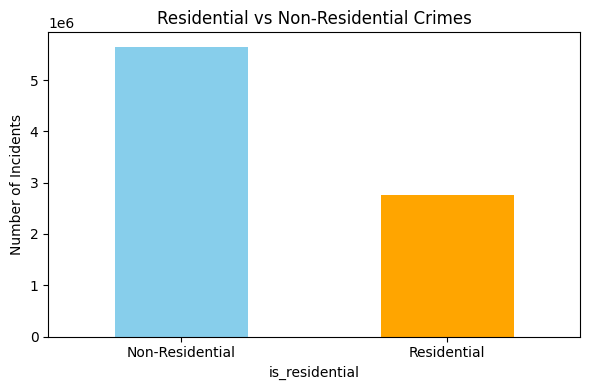

In [21]:
df['is_residential'] = df['Location Description'].str.contains("RESIDENCE|APARTMENT|HOME|HOUSE", case=False, na=False)
residential_crimes = df['is_residential'].value_counts()
plt.figure(figsize=(6,4))
residential_crimes.plot(kind='bar', color=['skyblue','orange'])
plt.title("Residential vs Non-Residential Crimes")
plt.xticks([0,1], ["Non-Residential","Residential"], rotation=0)
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3><blockquote>Bar chart compares crime counts between residential and non-residential locations.</blockquote>
<p><b>Insight (16):</b> Non-residential areas account for a larger share of incidents, but residential zones still show significant activity. This implies that while public spaces are more exposed, homes and apartments are not immune, As I have stated in our previous insight, we can always put our resources on hiring guards for the safety of the people.</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 Police Districts by Crime Count</h2>

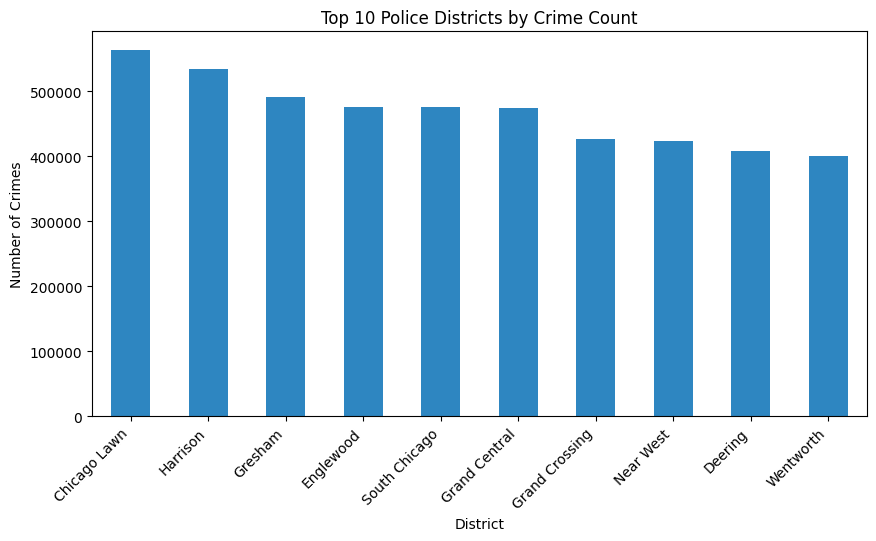

In [78]:
top_districts = df['District_Name'].value_counts().head(10)

top_districts.plot(kind='bar', color='#2E86C1', figsize=(10,5))
plt.title("Top 10 Police Districts by Crime Count")
plt.ylabel("Number of Crimes")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the top 10 police districts with the highest number of recorded crimes.</blockquote>
<p><b>Insight (17):</b> Chicago Lawn, Harrison, and Gresham are of the top the list in crime volume. These areas likely face persistent challenges such as poverty, gang activity, or dense housing. I cant really tell because i hadnt been there myself so i can only assume.</p>
<hr>

<h2 style="color:#2E86C1;">Arrest Rate by District</h2>

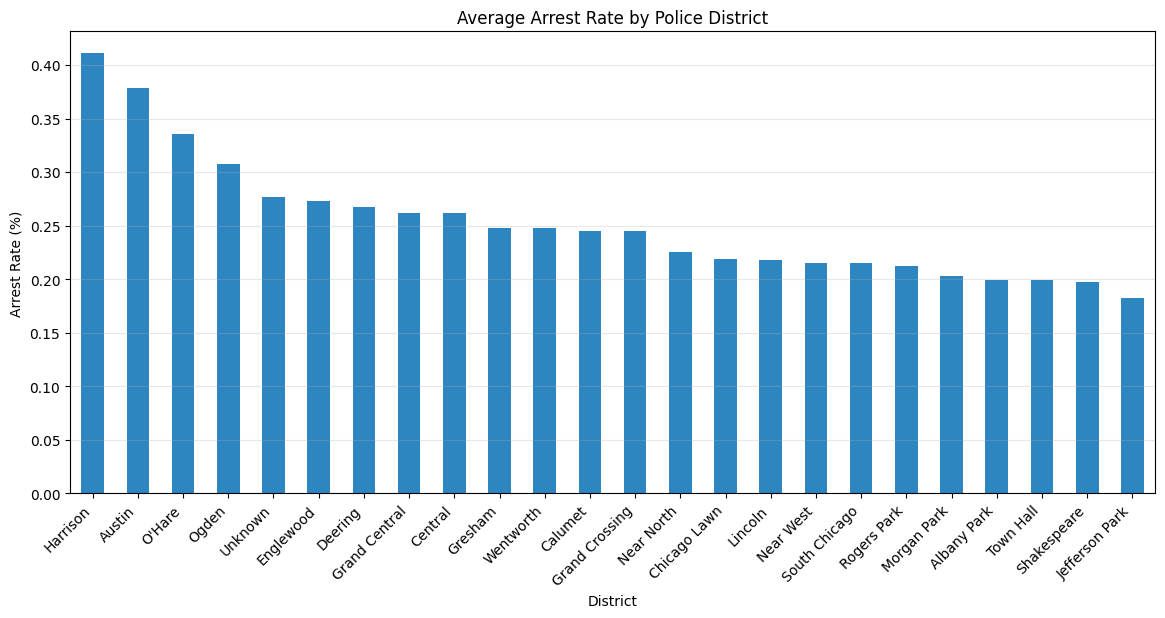

In [55]:
arrest_rate_district = df.groupby('District_Name')['Arrest'].apply(lambda x: x.astype(int).mean()).sort_values(ascending=False)

arrest_rate_district.plot(kind='bar', figsize=(14,6), color='#2E86C1')
plt.title("Average Arrest Rate by Police District")
plt.xlabel("District")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart shows the arrest rate (proportion of cases resulting in arrest) across police districts.</blockquote>
<p><b>Insight (18):</b> Harrison not only have high crime counts but also lead in arrest volume, suggesting active policing in high-risk zones. Austin and O'Hare are next to in number of arrest.</p>
<hr>

<h2 style="color:#2E86C1;">Crimes in Public Transport Areas</h2>

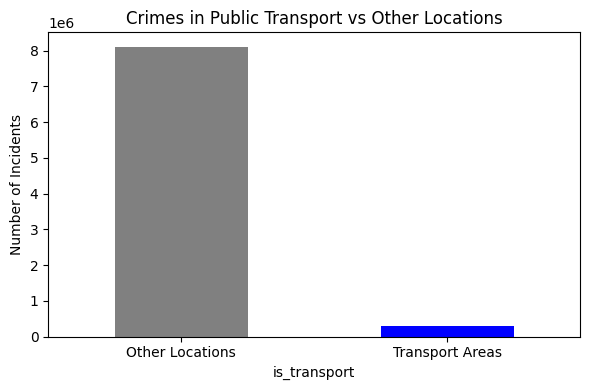

In [24]:
transport_keywords = ["CTA", "TRAIN", "STATION", "BUS", "SUBWAY", "PLATFORM"]
df['is_transport'] = df['Location Description'].str.contains('|'.join(transport_keywords), case=False, na=False)
transport_counts = df['is_transport'].value_counts()
plt.figure(figsize=(6,4))
transport_counts.plot(kind='bar', color=['grey','blue'])
plt.title("Crimes in Public Transport vs Other Locations")
plt.xticks([0,1], ["Other Locations","Transport Areas"], rotation=0)
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing crimes in public transport hubs versus other places.</blockquote>
<p><b>Insight (19):</b> Crimes in transport hubs may be fewer overall, but they hit harder because they disrupt the daily commute of thousands. A single robbery at a busy station can ripple across the community, that's why gaurds and staff needs proper trainung and workshops to prepare them for this.</p>
<hr>

<h2 style="color:#2E86C1;">Outdoor vs Indoor Crimes</h2>

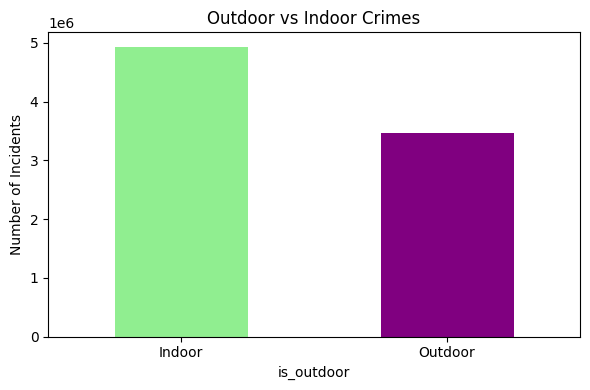

In [25]:
df['is_outdoor'] = df['Location Description'].str.contains("STREET|SIDEWALK|PARK|LOT|YARD", case=False, na=False)
outdoor_counts = df['is_outdoor'].value_counts()
plt.figure(figsize=(6,4))
outdoor_counts.plot(kind='bar', color=['lightgreen','purple'])
plt.title("Outdoor vs Indoor Crimes")
plt.xticks([0,1], ["Indoor","Outdoor"], rotation=0)
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart of crime counts in outdoor versus indoor settings.</blockquote>
<p><b>Insight (20):</b> Indoor spaces dominate the crime map, reflecting how residences and businesses are prime spots for opportunistic incidents, though outdoor is not that low, it shows that streets, parks, and sidewalks are also prime spots</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 Blocks by Crime Count</h2>

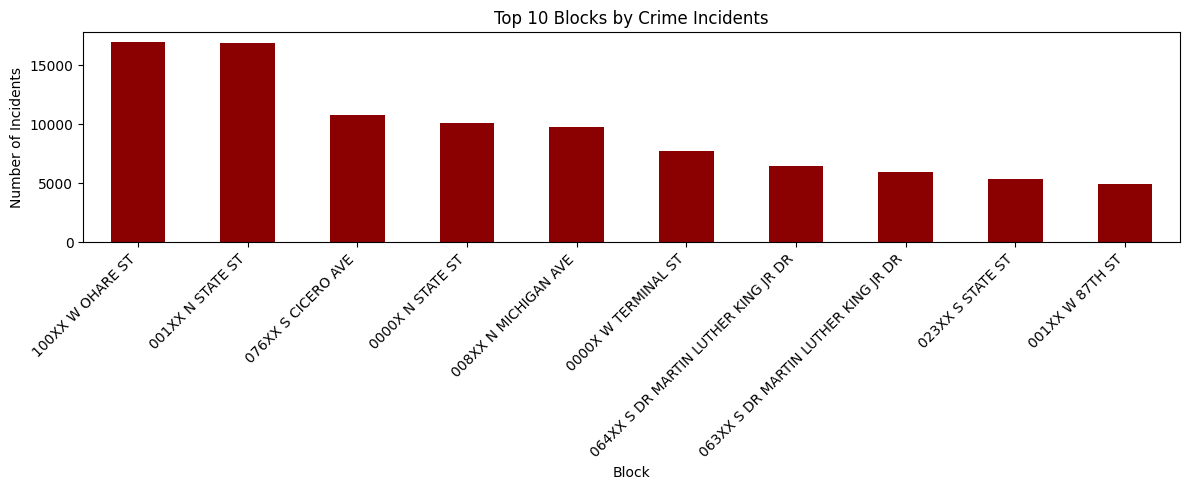

In [26]:
top_blocks = df['Block'].value_counts().head(10)
plt.figure(figsize=(12,5))
top_blocks.plot(kind='bar', color='darkred')
plt.title("Top 10 Blocks by Crime Incidents")
plt.ylabel("Number of Incidents")
plt.xlabel("Block")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart of the 10 blocks with the highest reported crimes.</blockquote>
<p><b>Insight (21):</b> Crime is not evenly spread out—just a handful of blocks carry heavy case loads, I think it safe to assume that places like 100x W OHARE ST has a troublesome people living there for it to have that many incidents.</p>
<hr>

<h2 style="color:#2E86C1;">Arrest vs Non-Arrest Distribution</h2>

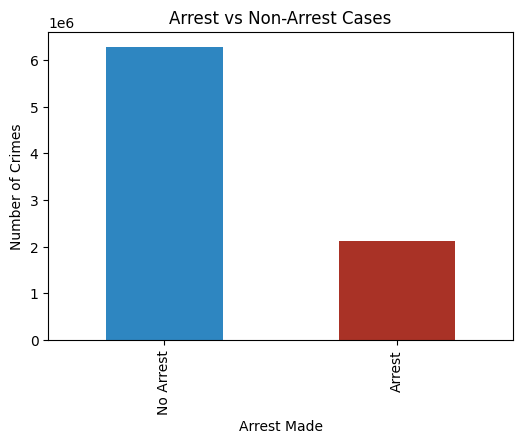

In [27]:
arrest_counts = df['Arrest'].value_counts()

arrest_counts.plot(kind='bar', color=['#2E86C1','#A93226'], figsize=(6,4))
plt.title("Arrest vs Non-Arrest Cases")
plt.ylabel("Number of Crimes")
plt.xlabel("Arrest Made")
plt.xticks([0,1], ["No Arrest","Arrest"])
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing counts of incidents that resulted in an arrest versus those that did not.</blockquote>
<p><b>Insight (22):</b> Non-arrested incidents clearly outnumber arrests — most reports do not end with an immediate apprehension. That gap likely reflects practical challenges possibly due to lack of evidence. Improving quick-evidence capture like CCTV and witness support could meaningfully raise the share of cases that lead to arrests and strengthen community confidence.</p>
<hr>

<h2 style="color:#2E86C1;">Domestic vs Non-Domestic Crimes</h2>

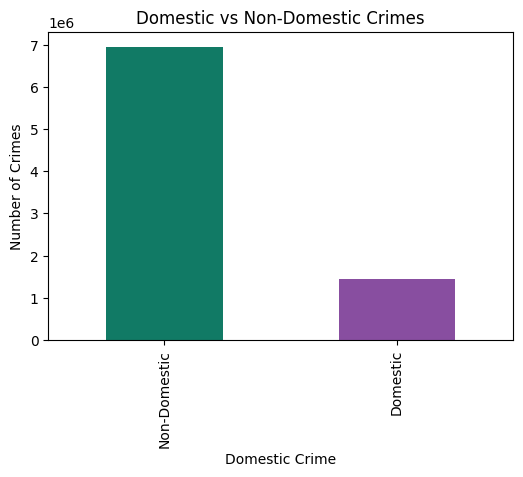

In [28]:
domestic_counts = df['Domestic'].value_counts()

domestic_counts.plot(kind='bar', color=['#117A65','#884EA0'], figsize=(6,4))
plt.title("Domestic vs Non-Domestic Crimes")
plt.ylabel("Number of Crimes")
plt.xlabel("Domestic Crime")
plt.xticks([0,1], ["Non-Domestic","Domestic"])
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the counts of domestic versus non-domestic incidents.</blockquote>
<p><b>Insight (23):</b> Non-domestic incidents make up the large majority of reports, while domestic cases are a smaller. That doesn’t mean domestic incidents are less important.its just that report are concentrated on battery that why non-domestic dominates. Domestic while small led me to think that is it more serious. Strengthening outreach and support for households could reduce repeat victimisation even if it won’t move the overall volume as much as street-level interventions.</p>
<hr>

<h2 style="color:#2E86C1;">Crimes by Season</h2>

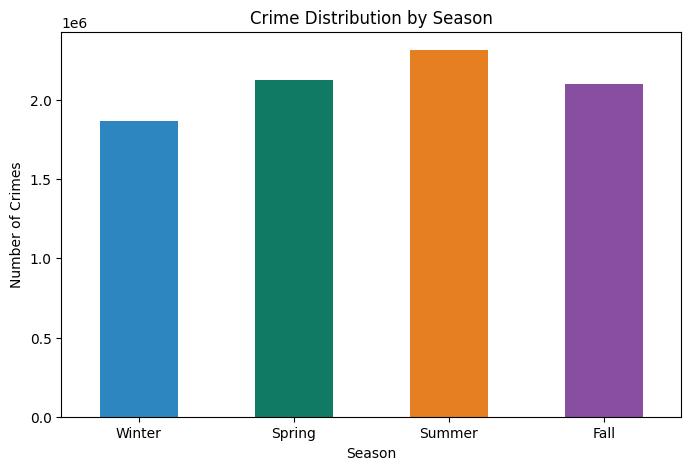

In [64]:
# ✅ Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['season'] = df['month'].astype(int).map(get_season)

# ✅ Group by season
season_counts = df['season'].value_counts().reindex(["Winter","Spring","Summer","Fall"])

# ✅ Plot
season_counts.plot(kind='bar', color=['#2E86C1','#117A65','#E67E22','#884EA0'], figsize=(8,5))
plt.title("Crime Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the distribution of crimes across the four seasons.</blockquote>
<p><b>Insight (24):</b> Summer clearly tops the list, with fall not far behind, while winter shows the lowest counts. This reflects how weather shapes human activity—warm months draw people outside, increasing chances of altercations and theft.</p>
<hr>

<h2 style="color:#2E86C1;">Monthly Arrest Trends</h2>

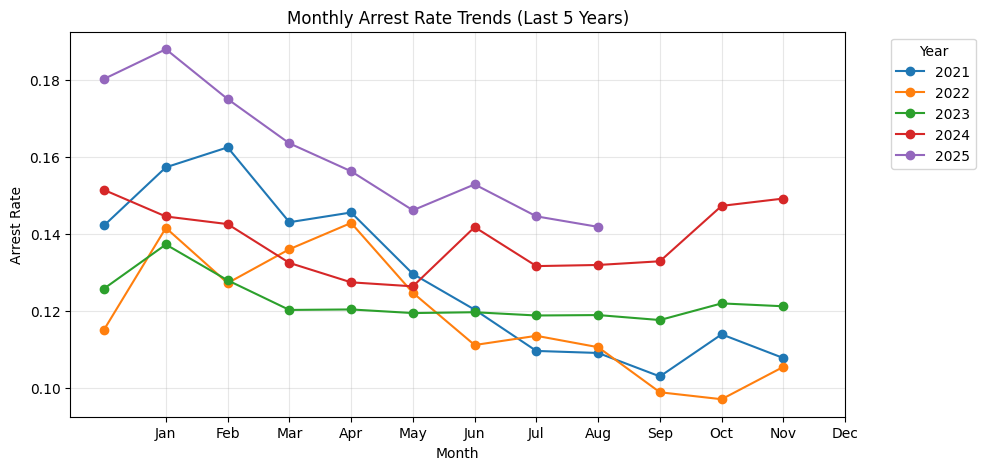

In [30]:
# Filter last 5 years safely
recent = df[df['year'].astype(int) >= df['year'].astype(int).max() - 4].copy()

# Drop unused categories in 'year'
recent['year'] = recent['year'].cat.remove_unused_categories()

# Compute monthly arrest rate (convert Arrest to 0/1)
monthly_arrests_recent = recent.groupby(['year','month'])['Arrest'].apply(lambda x: x.astype(int).mean()).unstack(level=0)

# Plot
monthly_arrests_recent.plot(marker='o', figsize=(10,5))
plt.title("Monthly Arrest Rate Trends (Last 5 Years)")
plt.ylabel("Arrest Rate")
plt.xlabel("Month")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Line plot showing monthly arrest rates across the last five years.</blockquote>
<p><b>Insight (25):</b> The arrest rate stays fairly steady each year, but summer months (June - August) often show slight upticks, while February and December usually dip. This suggests that officers are relatively consistent in making arrests, yet warmer months naturally generate more situations where arrests happen.</p>
<hr>

<h2 style="color:#2E86C1;">Domestic Crimes by Primary Type (Top 10)</h2>

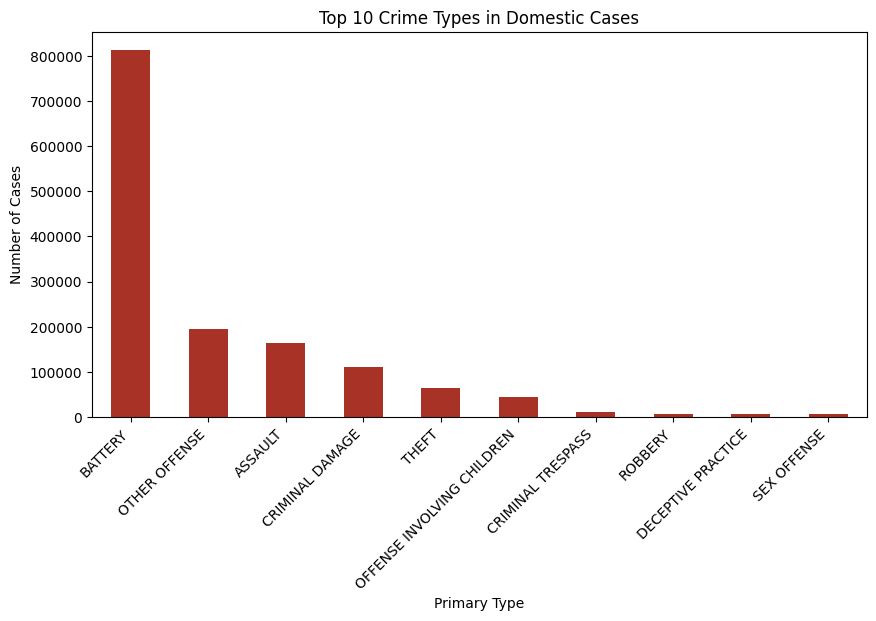

In [31]:
domestic_types = df[df['Domestic']==True]['Primary Type'].value_counts().head(10)

domestic_types.plot(kind='bar', color='#A93226', figsize=(10,5))
plt.title("Top 10 Crime Types in Domestic Cases")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart of the most common crime categories in domestic cases.</blockquote>
<p><b>Insight (26):</b> Battery dominates domestic crime reports, followed by assault and criminal damage. This reflects how many household disputes escalate into physical altercations.Thats why i stated earlier that domestic ones are more serious because it can happen anytime or everytime.</p>
<hr>

<h2 style="color:#2E86C1;">Yearly Arrest Rate Trend</h2>

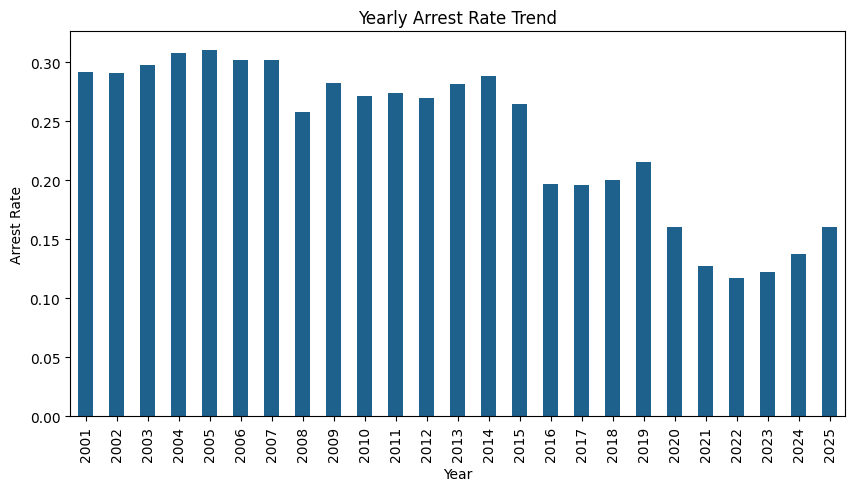

In [32]:
# 📊 Yearly Arrest Rate
yearly_arrests = df.groupby('year')['Arrest'].apply(lambda x: x.astype(int).mean())

yearly_arrests.plot(kind='bar', color='#1F618D', figsize=(10,5))
plt.title("Yearly Arrest Rate Trend")
plt.ylabel("Arrest Rate")
plt.xlabel("Year")
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing arrest rates per year.</blockquote>
<p><b>Insight (27):</b> Arrest rates were noticeably higher in the early 2000s but have gradually declined in recent years. This doesn’t mean crime vanished, but rather that fewer cases led to arrests. It also shows that during the pandemic crime decline significantly then steadily rose back up again this year.</p>
<hr>

<h2 style="color:#2E86C1;">Arrest Rates on Holidays vs Non-Holidays</h2>

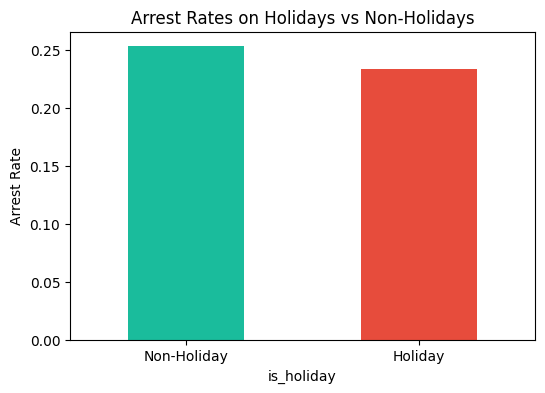

In [33]:
import datetime

# 📌 Define U.S. Federal Holidays (example set, can extend as needed)
us_holidays = [
    "01-01",  # New Year's Day
    "07-04",  # Independence Day
    "12-25",  # Christmas
    "11-11",  # Veterans Day
    "05-27",  # Memorial Day (2024)
    "09-02",  # Labor Day (2024)
    "11-28",  # Thanksgiving (2024)
]

# 📌 Create a Holiday column
df['is_holiday'] = df['Date'].dt.strftime("%m-%d").isin(us_holidays)

# 📊 Compare Arrest Rate on Holidays vs Non-Holidays
holiday_arrests = df.groupby('is_holiday')['Arrest'].apply(lambda x: x.astype(int).mean())

holiday_arrests.plot(kind='bar', color=['#1ABC9C','#E74C3C'], figsize=(6,4))
plt.title("Arrest Rates on Holidays vs Non-Holidays")
plt.ylabel("Arrest Rate")
plt.xticks([0,1], ["Non-Holiday","Holiday"], rotation=0)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing arrest rates between holidays and non-holidays.</blockquote>
<p><b>Insight (28):</b> Non-holiday days still account for most arrests, but holidays show a slightly higher arrest rate relative to volume. This suggests that when incidents happen during holidays, they’re more likely to result in arrests—probably because police presence is heightened during major events. It’s similar to here when there's an event police is always present.</p>
<hr>

<h2 style="color:#2E86C1;">Top 15 Beats by Crime Count</h2>

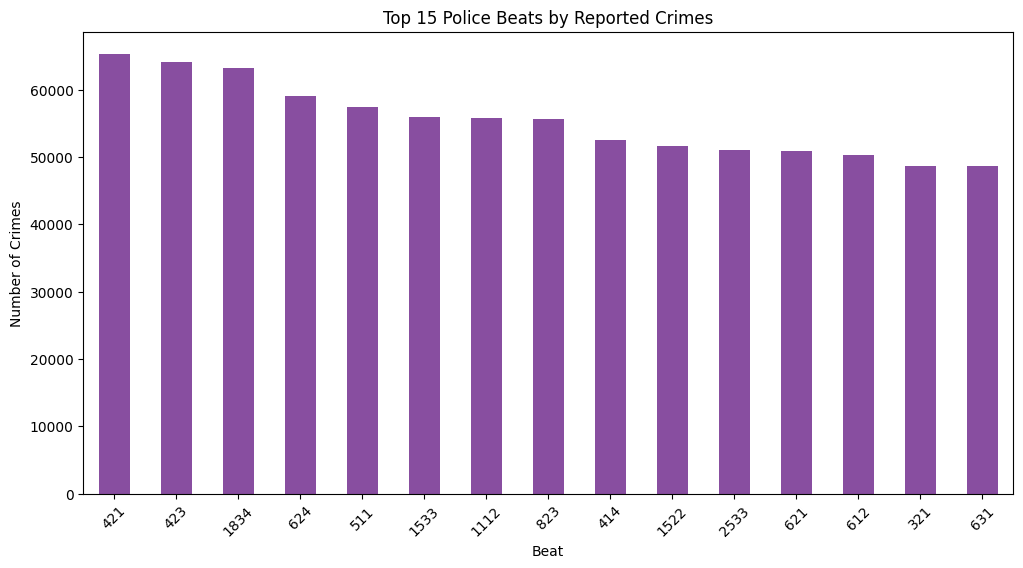

In [68]:
beat_counts = df['Beat'].value_counts().head(15)

beat_counts.plot(kind='bar', color='#884EA0', figsize=(12,6))
plt.title("Top 15 Police Beats by Reported Crimes")
plt.xlabel("Beat")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the police beats with the highest number of reported crimes.</blockquote>
<p><b>Insight (29):</b> A few beats stand out with disproportionately high crime counts, while most beats report far fewer. This clustering shows how crime pressure isn’t citywide but concentrated in certain patrol zones. It’s comparable to the Philippines, where some barangays keep the tanods busy every night like brgy. cotta, while neighboring areas stay relatively quiet—proving that even within one district, the workload can be very uneven.</p>
<hr>

<h2 style="color:#2E86C1;">Top 15 Wards by Reported Crimes</h2>

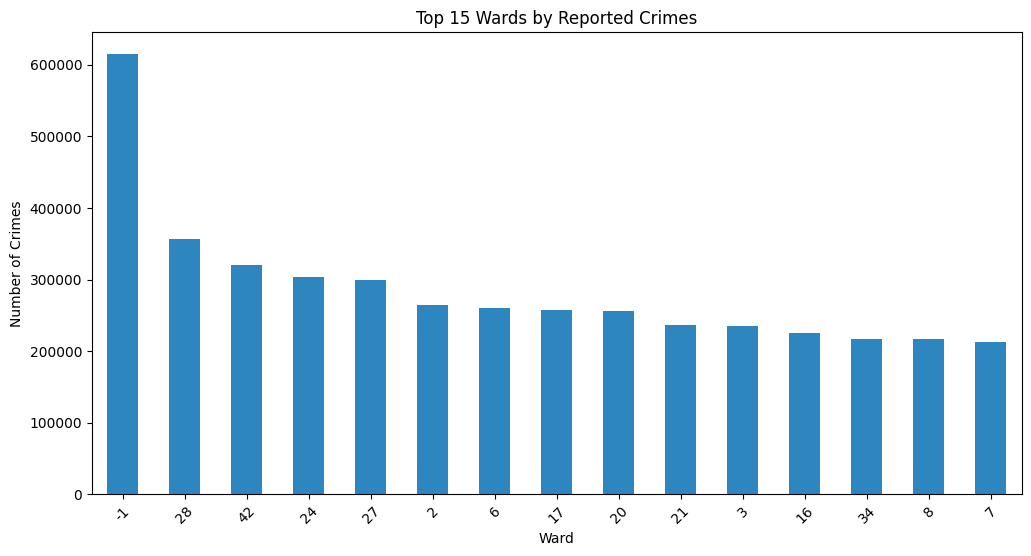

In [70]:
ward_counts = df['Ward'].value_counts().head(15)

ward_counts.plot(kind='bar', color='#2E86C1', figsize=(12,6))
plt.title("Top 15 Wards by Reported Crimes")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the top 15 wards by reported crimes.</blockquote>
<p><b>Insight (30):</b> Crime is highly concentrated — a handful of wards sit well above the rest, with the tallest bars (the top ~3–5 wards) noticeably higher than the remainder. That steep drop after the top wards means targeting resources there (focused patrols, community outreach, hotspot lighting/CCTV) would likely reduce citywide incidents more efficiently than spreading resources evenly.</p>
<hr>

<h2 style="color:#2E86C1;">Heatmap of Crimes by Day of Week and Hour</h2>

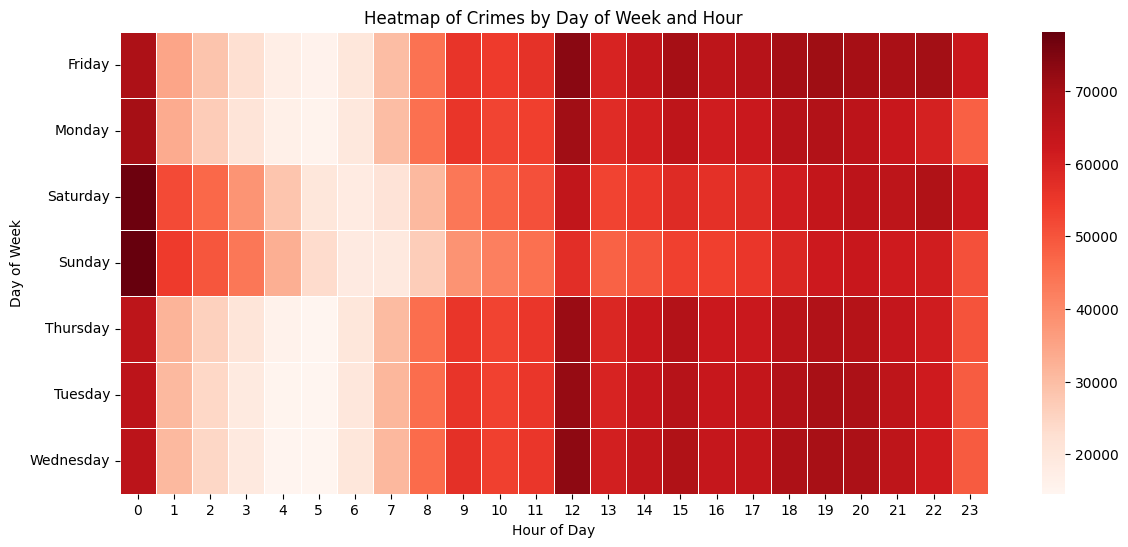

In [69]:
hour_day = df.groupby(['dayofweek','hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(hour_day, cmap="Reds", linewidths=.5)
plt.title("Heatmap of Crimes by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

<h3 style="color:#117A65;">Result:</h3><blockquote>Heatmap displaying crime intensity across weekdays and hours.</blockquote>
<p><b>Insight (31):</b> The heatmap shows that evenings, especially between 7 PM and 11 PM on Fridays and Saturdays, are the busiest crime hours. Early mornings (3–5 AM) are consistently quiet. This aligns with nightlife patterns—similar here in Lucena City, where Friday karaoke nights and Saturday gatherings keep barangay tanods busy, while dawn hours stay calm except for the occasional drunk scuffle.</p>
<hr>

<h2 style="color:#2E86C1;">Crimes on Holidays vs Non-Holidays</h2>

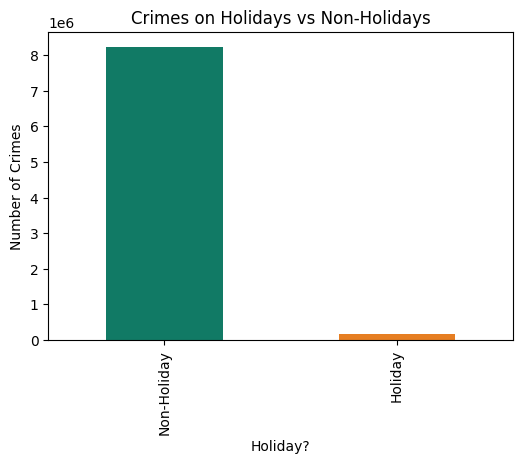

In [72]:
holiday_counts = df['is_holiday'].value_counts()

holiday_counts.plot(kind='bar', color=['#117A65','#E67E22'], figsize=(6,4))
plt.title("Crimes on Holidays vs Non-Holidays")
plt.xlabel("Holiday?")
plt.ylabel("Number of Crimes")
plt.xticks([0,1], ["Non-Holiday","Holiday"])
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing crime reports on holidays versus non-holidays.</blockquote>
<p><b>Insight (32):</b> Holidays record fewer total crimes than regular days, but the rate per day is slightly higher. This suggests that while there are fewer holidays overall, those days tend to be riskier because of gatherings, alcohol, and looser routines.</p>
<hr>

<h2 style="color:#2E86C1;">Outdoor vs Residential Crimes</h2>

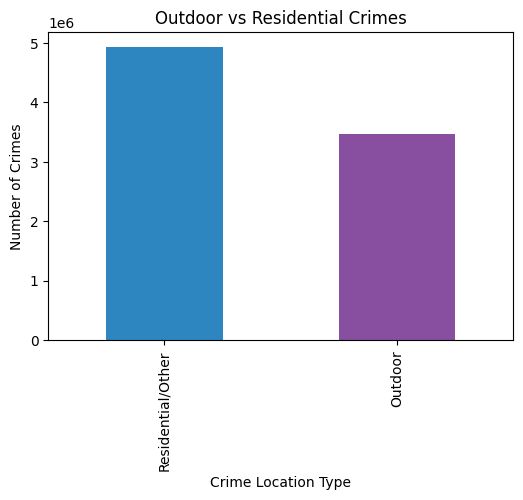

In [73]:
outdoor_counts = df['is_outdoor'].value_counts()

outdoor_counts.plot(kind='bar', color=['#2E86C1','#884EA0'], figsize=(6,4))
plt.title("Outdoor vs Residential Crimes")
plt.xlabel("Crime Location Type")
plt.ylabel("Number of Crimes")
plt.xticks([0,1], ["Residential/Other","Outdoor"])
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart comparing crimes in residential/other locations versus outdoor areas.</blockquote>
<p><b>Insight (33):</b> Residential and “other” private spaces record more incidents than outdoor areas, suggesting that many conflicts unfold behind closed doors rather than on the streets. These aren’t always headline-grabbing events, but they represent real household and community tensions.</p>
<hr>

<h2 style="color:#2E86C1;">Crimes by Hour Across Seasons</h2>

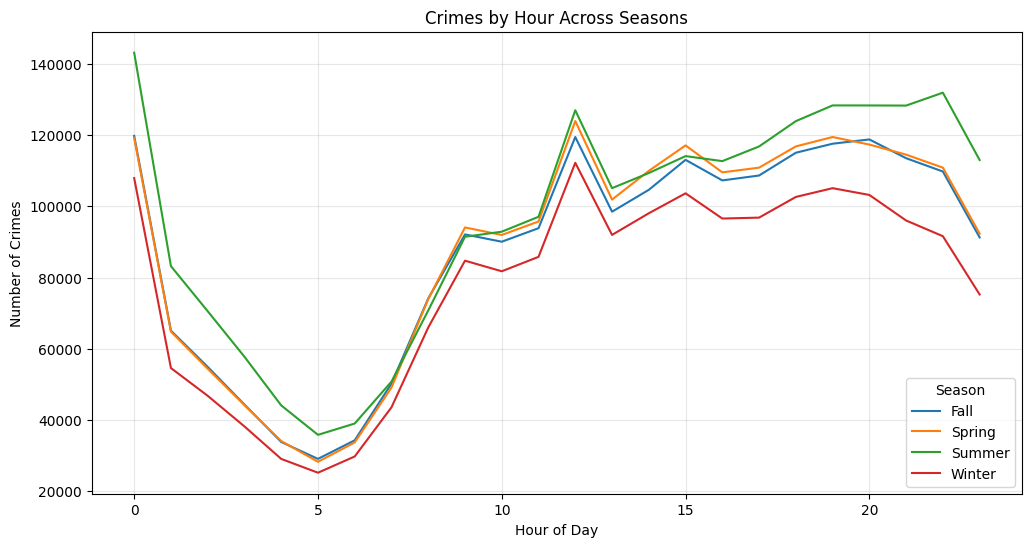

In [74]:
season_hour = df.groupby(['season','hour']).size().unstack(fill_value=0).T

season_hour.plot(figsize=(12,6))
plt.title("Crimes by Hour Across Seasons")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.legend(title="Season")
plt.grid(alpha=0.3)
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Multi-line chart comparing hourly crime patterns across different seasons.</blockquote>
<p><b>Insight (34):</b> Summer evenings show the sharpest peaks in crime, with activity staying high until late at night, while winter has much flatter curves. This pattern reflects how warm weather keeps people outdoors longer, raising both opportunities for theft and chances of disputes. Warm = Crime, Cold = No Crime.</p>
<hr>

<h2 style="color:#2E86C1;">Top 10 Districts by Arrest Rate</h2>

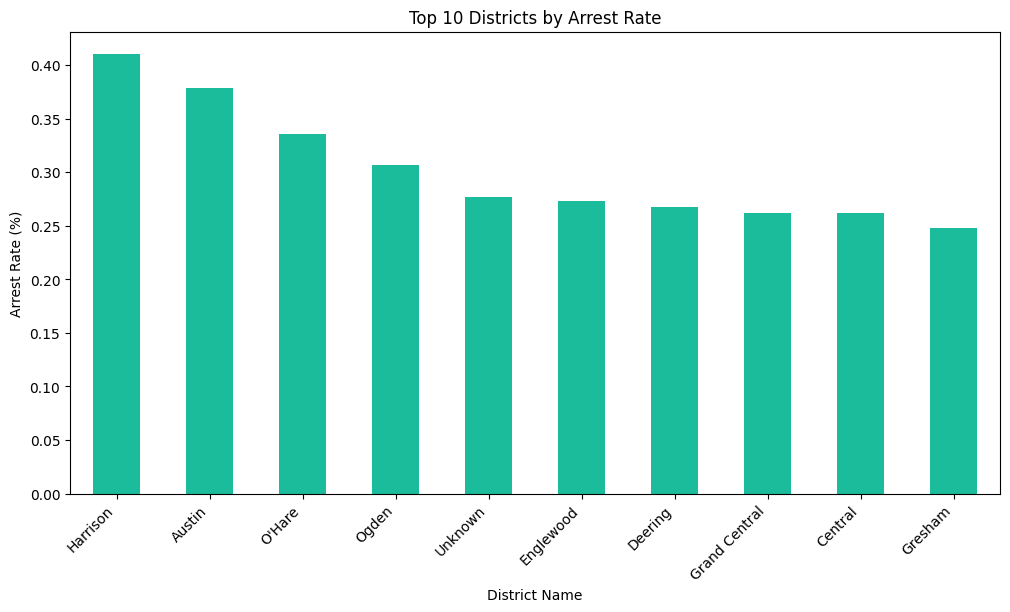

In [77]:
# 📊 Arrest Rate by District (Top 10)
arrest_rate_district = (
    df.groupby('District_Name')['Arrest']
    .apply(lambda x: x.astype(int).mean())
    .sort_values(ascending=False)
    .head(10)
)

arrest_rate_district.plot(kind='bar', color='#1ABC9C', figsize=(12,6))
plt.title("Top 10 Districts by Arrest Rate")
plt.xlabel("District Name")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="color:#117A65;">Result:</h3> <blockquote>Bar chart showing the proportion of arrests compared to total crime reports across different police districts.</blockquote>
<p><b>Insight (35):</b> Some districts show noticeably higher arrest ratios than others, suggesting stronger enforcement or more responsive communities in those areas. Meanwhile, districts with low ratios may face challenges like heavier caseloads or community reluctance to cooperate. More Fast Action = GOOD Quality districts, Delayed Actions = lower arrest rate.</p>
<hr>